I am aware of the overall limitations of my work on this assignment. In this notebook, I have all of my work for this assignment. I read the directions but I hope that just uploading a notebook is what I am supposed to do because I am not sure how or what I am supposed to do in terms of seperating out the simulation part and the notebook overall. I may learn about it now as I am begin submitting the assignment online. 

-4-15-22

In [33]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

1. This is both a DAG and an example for number one. I am very passionate about mental health so in this case, the main question I wanted to examine was the effect of exercise on mental health. In the first DAG, there is only one x variable and only one y variable which are exercise and mental health respectively. In the second DAG, I put in more things that could possibly affect mental health like income and age. 

This may be confusing but the "exercise, mental health" example is only for the pictures. In terms of trying to work with the data, I decided to do a different example involving a "certification class," (see explanation below the pictures). 


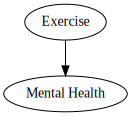

In [39]:
g = gr.Digraph()


g.edge("Exercise", "Mental Health")

g

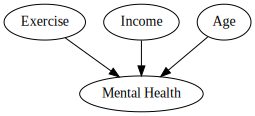

In [43]:
g = gr.Digraph()
g.edge("Exercise", "Mental Health")
g.edge("Income", "Mental Health")
g.edge("Age", "Mental Health")
g


Below is my attempt to generate data with the new example involving a certification class. In this case, I am trying to measure whether completing a certification program effects your income. In this case, I am generating my y variable as income and my x variable which is whether or not you completed a certain certification program. To then add more variables, I added how many years you have been in the labor force. This is very similar to the classic "schooling," "income," and "experience," example that we talked about in class and that people give except that it is slightly tweaked because its a certification and not amount of time in school like i've seen in classes. It gave out random numbers for the income and randomly assigned the treatment if I did it correctly. I am attempting to use the same "data genearting process" that we used in class which is the simple one.

In [61]:
import pandas as pd
import numpy as np
np.random.seed(2)
data4 = pd.DataFrame({"Income" : np.random.randint(low=1, high=100000, size=20),
                     "Treatment"  : np.random.randint(low=0, high=2, size=20)
                     })
data4

,Income,Treatment
0,89257,1
1,72174,1
2,95817,1
3,44567,0
4,31020,0
5,84435,0
6,33868,1
7,80233,1
8,44296,1
9,53923,0


In [62]:
import pandas as pd
import numpy as np
np.random.seed(2)
data5 = pd.DataFrame({"Income" : np.random.randint(low=1, high=100000, size=20),
                     "Treatment"  : np.random.randint(low=0, high=2, size=20),
                     "Years in the Labor Force"  : np.random.randint(low=0, high=40, size=20),
                     })
data5

,Income,Treatment,Years in the Labor Force
0,89257,1,6
1,72174,1,31
2,95817,1,19
3,44567,0,31
4,31020,0,2
5,84435,0,16
6,33868,1,12
7,80233,1,4
8,44296,1,26
9,53923,0,15


In [82]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [94]:
regression = 'Income~Treatment'

sum(regression)

#I had a hard time with this. 

TypeError: unsupported operand type(s) for +: 'int' and 'str'

*Note- The following code is copied and pasted from what we did in class except for the fact that I changed some of the numbers at the bottom and the seed. I hope that this is an appropriate process to use. 

In [104]:


def fn_variance(data, ddof=0):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / (n - ddof)
# Note this is equivalent to np.var(Yt,ddof)

def fn_generate_cov(dim):
    acc  = []
    for i in range(dim):
        row = np.ones((1,dim)) * corr
        row[0][i] = 1
        acc.append(row)
    return np.concatenate(acc,axis=0)

def fn_generate_multnorm(nobs,corr,nvar):

    mu = np.zeros(nvar)
    std = (np.abs(np.random.normal(loc = 1, scale = .5,size = (nvar,1))))**(1/2)
    # generate random normal distribution
    acc = []
    for i in range(nvar):
        acc.append(np.reshape(np.random.normal(mu[i],std[i],nobs),(nobs,-1)))
    
    normvars = np.concatenate(acc,axis=1)

    cov = fn_generate_cov(nvar)
    C = np.linalg.cholesky(cov)

    Y = np.transpose(np.dot(C,np.transpose(normvars)))

#     return (Y,np.round(np.corrcoef(Y,rowvar=False),2))
    return Y

def fn_randomize_treatment(N,p=0.5):
    treated = random.sample(range(N), round(N*p))
    return np.array([(1 if i in treated else 0) for i in range(N)]).reshape([N,1])
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from tqdm import tqdm
random.seed(109)

def fn_generate_data(tau,N,p,p0,corr,conf = True,flagX = False):
    """
    p0(int): number of covariates with nonzero coefficients
    """
    nvar = p+2 # 1 confounder and variable for randomizing treatment
    corr = 0.5 # correlation for multivariate normal

    if conf==False:
        conf_mult = 0 # remove confounder from outcome
        
    allX = fn_generate_multnorm(N,corr,nvar)
    W0 = allX[:,0].reshape([N,1]) # variable for RDD assignment
    C = allX[:,1].reshape([N,1]) # confounder
    X = allX[:,2:] # observed covariates
    
    T = fn_randomize_treatment(N) # choose treated units
    err = np.random.normal(0,1,[N,1])
    beta0 = np.random.normal(5,5,[p,1])
    
    beta0[p0:p] = 0 # sparse model
    Yab = tau*T+X@beta0+conf_mult*0.6*C+err
    if flagX==False:
        return (Yab,T)
    else:
        return (Yab,T,X)
    
    # regression discontinuity
#     W = W0 + 0.5*C+3*X[:,80].reshape([N,1])-6*X[:,81].reshape([N,1])
#     treated = 1*(W>0)
#     Yrdd = 1.2* treated - 4*W + X@beta0 +0.6*C+err

def fn_tauhat_means(Yt,Yc):
    nt = len(Yt)
    nc = len(Yc)
    tauhat = np.mean(Yt)-np.mean(Yc)
    se_tauhat = (np.var(Yt,ddof=1)/nt+np.var(Yc,ddof=1)/nc)**(1/2)
    return (tauhat,se_tauhat)

def fn_bias_rmse_size(theta0,thetahat,se_thetahat,cval = 1.96):
    """
    theta0 - true parameter value
    thetatahat - estimated parameter value
    se_thetahat - estiamted se of thetahat
    """
    b = thetahat - theta0
    bias = np.mean(b)
    rmse = np.sqrt(np.mean(b**2))
    tval = b/se_thetahat # paramhat/se_paramhat H0: theta = 0
    size = np.mean(1*(np.abs(tval)>cval))
    # note size calculated at true parameter value
    return (bias,rmse,size)

def fn_run_experiments(tau,Nrange,p,p0,corr,conf,flagX=False):
    n_values = []
    tauhats = []
    sehats = []
    lb = []
    ub = []
    for N in tqdm(Nrange):
        n_values = n_values + [N]
        if flagX==False:
            Yexp,T = fn_generate_data(tau,N,p,p0,corr,conf,flagX)
            Yt = Yexp[np.where(T==1)[0],:]
            Yc = Yexp[np.where(T==0)[0],:]
            tauhat,se_tauhat = fn_tauhat_means(Yt,Yc)            
        elif flagX==1:
            # use the right covariates in regression
            Yexp,T,X = fn_generate_data(tau,N,p,p0,corr,conf,flagX)
            Xobs = X[:,:p0]
            covars = np.concatenate([T,Xobs],axis = 1)
            mod = sm.OLS(Yexp,covars)
            res = mod.fit()
            tauhat = res.params[0]
            se_tauhat = res.HC1_se[0]
        elif flagX==2:
            # use some of the right covariates and some "wrong" ones
            Yexp,T,X = fn_generate_data(tau,N,p,p0,corr,conf,flagX)
            Xobs1 = X[:,:np.int(p0/2)]
            Xobs2 = X[:,-np.int(p0/2):]
            covars = np.concatenate([T,Xobs1,Xobs2],axis = 1)
            mod = sm.OLS(Yexp,covars)
            res = mod.fit()
            tauhat = res.params[0]
            se_tauhat = res.HC1_se[0]
            
        tauhats = tauhats + [tauhat]
        sehats = sehats + [se_tauhat]    
        lb = lb + [tauhat-1.96*se_tauhat]
        ub = ub + [tauhat+1.96*se_tauhat]
        
    return (n_values,tauhats,sehats,lb,ub)


def fn_plot_with_ci(n_values,tauhats,tau,lb,ub,caption):
    fig = plt.figure(figsize = (10,6))
    plt.plot(n_values,tauhats,label = '$\hat{\\tau}$')
    plt.xlabel('N')
    plt.ylabel('$\hat{\\tau}$')
    plt.axhline(y=tau, color='r', linestyle='-',linewidth=1,
                label='True $\\tau$={}'.format(tau))
    plt.title('{}'.format(caption))
    plt.fill_between(n_values, lb, ub,
        alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848',label = '95% CI')
    plt.legend()
    
tau = 9
corr = .6
conf=False
p = 19
p0 = 0 # number of other variables in the regression
Nrange = range(1,35,2) # loop over N values
(nvalues,tauhats,sehats,lb,ub) = fn_run_experiments(tau,Nrange,p,p0,corr,conf)

100%|██████████████████████████████████████████| 17/17 [00:00<00:00, 678.40it/s]


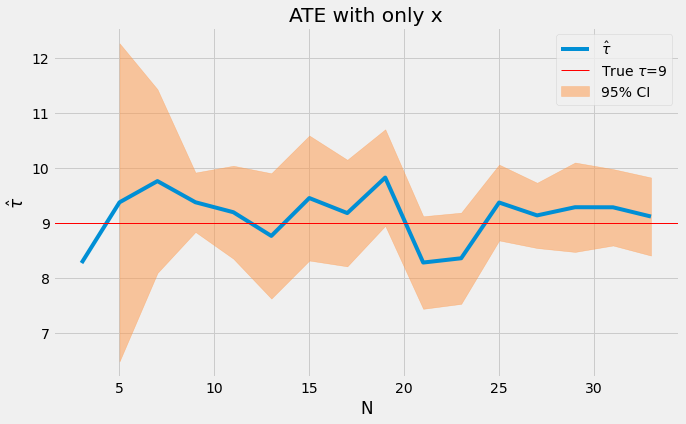

In [105]:
caption = """ATE with only X"""
fn_plot_with_ci(nvalues,tauhats,tau,lb,ub,caption)

In [108]:
estDict = {}
R = 2000
for N in [100,550,900,1000,10000]:
    tauhats = []
    sehats = []
    for r in tqdm(range(R)):
        Yexp,T = fn_generate_data(tau,N,10,0,corr,conf)
        Yt = Yexp[np.where(T==1)[0],:]
        Yc = Yexp[np.where(T==0)[0],:]
        tauhat,se_tauhat = fn_tauhat_means(Yt,Yc)
        tauhats = tauhats + [tauhat]
        sehats = sehats + [se_tauhat]
    estDict[N] = {
        'tauhat':np.array(tauhats).reshape([len(tauhats),1]),
        'sehat':np.array(sehats).reshape([len(sehats),1])
    }

tau0 = tau*np.ones([R,1])
for N, results in estDict.items():
    (bias,rmse,size) = fn_bias_rmse_size(tau0,results['tauhat'],
                                         results['sehat'])
    print(f'N={N}: bias={bias}, RMSE={rmse}, size={size}')

100%|███████████████████████████████████████| 2000/2000 [14:20<00:00,  2.33it/s]

N=100: bias=0.004665143117153593, RMSE=0.20005567812737302, size=0.0585
N=550: bias=-0.0009807323059150281, RMSE=0.0865369849111099, size=0.0505
N=900: bias=0.002371610544266085, RMSE=0.06693774782539232, size=0.0545
N=1000: bias=0.00023714543163702297, RMSE=0.06133692059720348, size=0.0445
N=10000: bias=-0.00024539583962780666, RMSE=0.02030642043189459, size=0.053


100%|██████████████████████████████████████████| 17/17 [00:00<00:00, 387.61it/s]


ValueError: x and y must have same first dimension, but have shapes (17,) and (2000,)

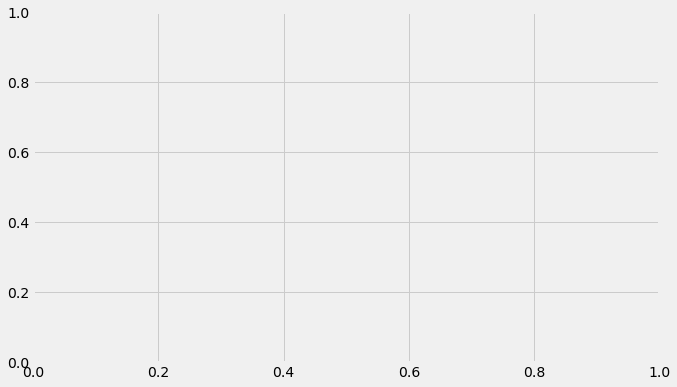

In [111]:
#note: I may have done this wrong. 

tau = 9
corr = .6
conf=False
p = 19
p0 = 5 # number of covariates used in the DGP
Nrange = range(1,35,2) # loop over N values
(nvalues_x,tauhats_x,sehats_x,lb_x,ub_x) = fn_run_experiments(tau,Nrange,p,p0,corr,conf)

caption = """version with one control variables"""
fn_plot_with_ci(nvalues,tauhats,tau,lb,ub,caption)



Start of Question #2

*Note- I am not able to do the simulation the proper way that we learned in class so the best thing that I thought that I could attempt to do was a regression which we learned in class is similar to this kind of methodology. I first randomly generated the table below with the three variables. Since I was unable to figure out how to do the regression immediately aftewards, I created arrays where I put in the same data that was randomly generated and then I attempted to run a regression first without the "confounding," factor and then with both the regular variable and the "confounding" factor. I was kind of able to get the first one (ultimately it seems wrong) but was unable to do the regression with both in there. Moreover, I was just able to get the predicted y values if I did it correctly although it seems incorrect. I did not do the Monte Carlo Simulation. I am attempting to use the same "data generating process" as we did in class which is the standard one.

Below, I explain what the example is about.

In [100]:
np.random.seed(19)
data6 = pd.DataFrame({"SAT Scores" : np.random.randint(low=1, high=2000, size=20),
                     "Treatment"  : np.random.randint(low=0, high=2, size=20),
                     "Amount of Time that Parents Went to School"  : np.random.randint(low=0, high=28, size=20),
                     })
data6

,SAT Scores,Treatment,Amount of Time that Parents Went to School
0,1630,1,8
1,623,1,5
2,758,0,5
3,1379,1,0
4,937,1,17
5,1044,1,4
6,309,1,22
7,1355,1,17
8,1696,0,12
9,835,1,19


In [124]:
x1 = np.array([1,1,0,1, 1, 1, 1, 1,0,1,1,1,0,1,1,0,1,1,1,1 ]). reshape((-1, 1))
print(x1.shape)
x2= np.array([8,5,5,0,17,4,22,17,12,19,17,13,20,17,19,5,25,19,27,23]). reshape ((-1, 1))
print(x2.shape)
y= np.array([1630,623,758,1379,937, 1044, 309,1355,1696,835,1465,1559, 163, 1926, 1634, 267, 343, 307, 365, 1192])


(20, 1)
(20, 1)


In [130]:
reg.fit(x1, y)

LinearRegression()

In [133]:
y_hat = reg.predict(x1)
print(y_hat)

[1056.4375 1056.4375  721.     1056.4375 1056.4375 1056.4375 1056.4375
 1056.4375  721.     1056.4375 1056.4375 1056.4375  721.     1056.4375
 1056.4375  721.     1056.4375 1056.4375 1056.4375 1056.4375]


In [138]:
reg.fit(x1, x2,)
y_pred = reg.predict(x1, x2)
print(y_pred2)

#This code is wrong. 

TypeError: predict() takes 2 positional arguments but 3 were given

###2. This is both my DAG and my practical example for a "confounding variable." In this case, we are trying to gauge how much taking an SAT Prep course impacts your standardized test scores. I think that I have heard an example about this before. However, I have learned in another class that the amount of education, income, "motivation," etc... from your parents could be used in certain models because it may influence whether or not you can afford or desire to take an SAT Prep Course and how well you do on the test itself. The "family history," variable is the "confounding factor," here. I am attempting to use the same "data generating process" as we did in class which is the standard one.


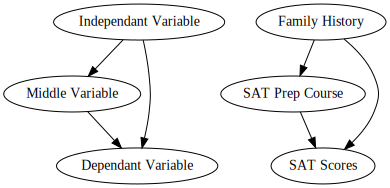

In [34]:
g = gr.Digraph()
g.edge("Independant Variable", "Middle Variable")
g.edge("Independant Variable", "Dependant Variable")
g.edge("Middle Variable", "Dependant Variable")

g.edge("Family History", "SAT Prep Course"),
g.edge("Family History", "SAT Scores"),
g.edge("SAT Prep Course", "SAT Scores")
g

###3. This is my practical application of "Selection Bias" and also my DAG for question #3. This example is very similar to an example that we discussed in class and from the Python Causality handbook but I tweaked it to something that I am interested in. I am very interested in the sports business and sports teams are constantly looking for ways to increase the number of people that go to the games. In this case, we are trying to measure how much special "promotions" affect whether people go to games. For instance, some people could be given a special promotion ( via a random number generator which says that if they come to the game, they will receive a coupon on concessions or merchandise at the game, or maybe they receive a "souvenir gift". However, the middle variable in this case– which does not allow for the x to y connection "cleanly"– is whether or not people actually read the text and knew about the promotion. In this case, people, "self select," into the promotion by actually clicking on the text and reading it. I hope that this is a correct "selection bias" example I am attempting to use the same "data generating process" as we did in class which is the standard one. Ultimately, my regrssion seems. 

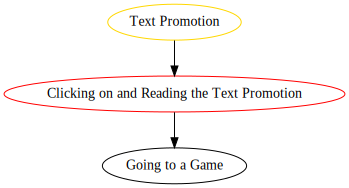

In [36]:
g = gr.Digraph()

g.edge("Text Promotion", "Clicking on and Reading the Text Promotion"), g.node("Text Promotion", color="gold"), g.edge("Clicking on and Reading the Text Promotion", "Going to a Game"), g.node("Clicking on and Reading the Text Promotion", color="red")

g

In [102]:
np.random.seed(39)
data9 = pd.DataFrame({"Amount of People that Went to a Sporting Event" : np.random.randint(low=1, high=50000, size=20),
                     "Treatment"  : np.random.randint(low=0, high=2, size=20),
                     "Whether or Not the Person Read the text"  : np.random.randint(low=0, high=2, size=20),
                     })
data9

,Amount of People that Went to a Sporting Event,Treatment,Whether or Not the Person Read the text
0,24682,0,1
1,7210,1,0
2,33857,1,1
3,31303,1,0
4,43236,0,1
5,35964,1,1
6,24965,0,0
7,8124,1,0
8,49740,0,0
9,45984,0,1


In [147]:
x4 = np.array([0,1,1,1, 0, 1, 0, 1,0,0,0,1,1,1,0,1,1,1,0,0 ]). reshape((-1, 1))
print(x5.shape)
x5= np.array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]). reshape ((-1, 1))
print(x5.shape)
y2= np.array([24682,7210,33857,31303,43236, 35964, 24965,8124,49740,45984,38030,43807, 9166, 30733, 44717, 20185, 37791, 48533, 4645, 22997])
y_hat_2 = reg.predict(x4)
y_hat_2


(20, 1)
(20, 1)


array([[10.5 ],
       [15.75],
       [15.75],
       [15.75],
       [10.5 ],
       [15.75],
       [10.5 ],
       [15.75],
       [10.5 ],
       [10.5 ],
       [10.5 ],
       [15.75],
       [15.75],
       [15.75],
       [10.5 ],
       [15.75],
       [15.75],
       [15.75],
       [10.5 ],
       [10.5 ]])

If I am correct, as we learned in class, when you have selectiom bias like this, we should not include the variables. In this case, whether someone red the text makes it not easy to tell the concrete effect of the text message with the promotion on the number of people that attend games. Thus, I believe that running the regression with and without the unproper factor (the Treatment here) should show this selection bias issue. I did not do the Monte Carlo simulation. It seems like I messed up the regression here as well. 

Some Works Cited that I used or looked at along the way without directly using here:
Python Causality Handbook,
 https://www.listendata.com/2019/04/create-dummy-data-in-python.html

https://www.youtube.com/watch?v=6biU48ZAx3o

https://gtribello.github.io/mathNET/assets/notebook-writing.html

https://www.youtube.com/watch?v=z_BXANUOjJY
https://stackoverflow.com/questions/29623171/simple-prediction-using-linear-regression-with-python

https://realpython.com/linear-regression-in-python/

https://programmathically.com/linear-regression-in-python/

https://pbpython.com/monte-carlo.html
https://towardsdatascience.com/monte-carlo-simulations-with-python-part-1-f5627b7d60b0


https://reproducible-science-curriculum.github.io/sharing-RR-Jupyter/01-sharing-github/


https://gtribello.github.io/mathNET/assets/notebook-writing.html

https://www.youtube.com/watch?v=iUKCIh3SotE

https://www.youtube.com/watch?v=Tv701NoFKw8

https://www.youtube.com/watch?v=9auEJgjVKWM




